<a href="https://colab.research.google.com/github/abdullatif14/Abdulatif_Moringa-IP--week6/blob/main/Abdilatif_Regression_IP_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis with Exploratory Data Analysis 

##1. Defining the question

###a)specifying the question


A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly

###b)Defining the metric for success

Feature engineering

descriptive and inferential statistics

polynomial regression

Logistic regression

###c)Understanding the context
The FIFA World Ranking is a ranking system for men's national teams in world football. This research consists of 2 datasets; a ranking and results datasets.

Ranking has been changing over the years. The current method of calculation is the Elo method

The Elo method of calculation adds/subtracts points (as opposed to averaging points) for individual
matches to/from a team’s existing point total. The points which are added or subtracted are partially
determined by the relative strength of the two opponents, including the logical expectation that teams
higher in the ranking should fare better against teams lower in the ranking.

The study is meant to predict the scores in Team A and Team B whether they play at home or away.


###d)Recording the experimental design 

Perform necessary feature engineering 

Check of multicollinearity

building the model

Cross-validate the model


Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

Perform appropriate regressions on the data including your justification

Making predictions

###e)Data Relevance

The data is applicable for modelling and predicting our scores

##Reading the Data

importing Libraries

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading our dataset
1. FIFA RANKING

In [209]:
fifa = pd.read_csv('/content/fifa_ranking.csv')
fifa.head()

fifa.shape


(57793, 16)

In [210]:

# Check the unique entries in the country_full column

(print('There are ' + str(fifa['country_full']. nunique()) + ' unique countries in our dataframe'))

There are 216 unique countries in our dataframe


In [211]:
print(fifa.describe())

print('*'*60)

print(fifa.info())

print('*'*60) #acts as a separator

print(fifa.dtypes)# knowing if the data has the right datatypes



               rank  total_points  ...  three_year_ago_avg  three_year_ago_weighted
count  57793.000000  57793.000000  ...        57793.000000             57793.000000
mean     101.628086    122.068637  ...           59.173916                11.834811
std       58.618424    260.426863  ...          135.533343                27.106675
min        1.000000      0.000000  ...            0.000000                 0.000000
25%       51.000000      0.000000  ...            0.000000                 0.000000
50%      101.000000      0.000000  ...            0.000000                 0.000000
75%      152.000000     92.790000  ...           21.250000                 4.250000
max      209.000000   1775.030000  ...         1200.770000               240.150000

[8 rows x 12 columns]
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype

In [212]:
print(fifa.isnull().sum()) 
#checking for the missing values
print('*'*60)
print(fifa.drop_duplicates())



rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
************************************************************
       rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206   

In [213]:
#Lets now drop unnecessary columns
fifa = fifa.drop(['total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted',
                  'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 
                  'three_year_ago_avg', 'three_year_ago_weighted','country_abrv'],axis=1)

In [214]:
#getting the new fifa ranking after dropping columns
fifa.head()

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08


In [215]:
#changing rank date from object to date time
import datetime
fifa['rank_date'] =  pd.to_datetime(fifa['rank_date'])

print(fifa.shape)

print(fifa.info())
                                    

(57793, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rank           57793 non-null  int64         
 1   country_full   57793 non-null  object        
 2   confederation  57793 non-null  object        
 3   rank_date      57793 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.8+ MB
None


RESULTS DATASET



In [216]:
#importing the results dataset
results = pd.read_csv('/content/results.csv')
results.head()
results.shape

(40839, 9)

In [217]:
#checking for unique values in our columns
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [218]:
# describing some statistical data in home score and away score
print(results.describe())
print('*'*60)
# checking if the data has the right datatype
print(results.dtypes)


         home_score    away_score
count  40839.000000  40839.000000
mean       1.745709      1.188105
std        1.749145      1.405120
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000
************************************************************
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


In [219]:
results.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [220]:
#changing the date to datetime
results['date'] = pd.to_datetime(results['date'])

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [221]:
# lets now drop unnecessary columns
results = results.drop(['city', 'country', 'neutral','date'], axis=1)

In [222]:
results.shape

(40839, 5)

##Feature Engineering

Lets merge the fifa ranking and results datasets 

In [223]:
#merge the results dataset and the fifa_rankings dataset based on the results home_team column.


home_team = pd.merge(results, fifa ,left_on=['home_team'],right_on=['country_full'], how='left')
home_team.head()

,home_team,away_team,home_score,away_score,tournament,rank,country_full,confederation,rank_date
0,Scotland,England,0,0,Friendly,30.0,Scotland,UEFA,1993-08-08
1,Scotland,England,0,0,Friendly,28.0,Scotland,UEFA,1993-09-23
2,Scotland,England,0,0,Friendly,29.0,Scotland,UEFA,1993-10-22
3,Scotland,England,0,0,Friendly,25.0,Scotland,UEFA,1993-11-19
4,Scotland,England,0,0,Friendly,24.0,Scotland,UEFA,1993-12-23


In [224]:
#merge the datasets based on the away team columns

away_team = pd.merge(results, fifa, left_on=['away_team'], right_on=['country_full'], how='left')
away_team.head()

,home_team,away_team,home_score,away_score,tournament,rank,country_full,confederation,rank_date
0,Scotland,England,0,0,Friendly,11.0,England,UEFA,1993-08-08
1,Scotland,England,0,0,Friendly,5.0,England,UEFA,1993-09-23
2,Scotland,England,0,0,Friendly,10.0,England,UEFA,1993-10-22
3,Scotland,England,0,0,Friendly,8.0,England,UEFA,1993-11-19
4,Scotland,England,0,0,Friendly,11.0,England,UEFA,1993-12-23


In [225]:
print(home_team.shape)
print(away_team.shape)

(10279368, 9)
(10203687, 9)


In [226]:
# from the shape of the datasets we can see the rows of the datasets have massively increased 
# due to duplicates created while merging
# lets drop the duplicated

home_team = home_team.drop_duplicates(['home_team', 
'away_team','home_score','away_score','tournament', 'confederation'], keep='first')


In [227]:
home_team.shape

(36512, 9)

In [228]:
# We do the same to the away team
away_team = away_team.drop_duplicates([ 'home_team', 
'away_team','home_score','away_score','tournament', 'confederation'], keep='first')

In [229]:
away_team.shape

(36512, 9)

In [230]:

# Merging both the away team and home team
new_fifa = pd.merge(home_team, away_team, how = 'left', left_on = ['home_team', 'away_team', 'tournament', 
                                                     'home_score', 'away_score'], 
                    right_on = ['home_team', 'away_team', 'tournament', 'home_score', 'away_score'])

In [231]:
new_fifa.shape

new_fifa.head()

,home_team,away_team,home_score,away_score,tournament,rank_x,country_full_x,confederation_x,rank_date_x,rank_y,country_full_y,confederation_y,rank_date_y
0,Scotland,England,0,0,Friendly,30.0,Scotland,UEFA,1993-08-08,11.0,England,UEFA,1993-08-08
1,England,Scotland,4,2,Friendly,11.0,England,UEFA,1993-08-08,30.0,Scotland,UEFA,1993-08-08
2,Scotland,England,2,1,Friendly,30.0,Scotland,UEFA,1993-08-08,11.0,England,UEFA,1993-08-08
3,England,Scotland,2,2,Friendly,11.0,England,UEFA,1993-08-08,30.0,Scotland,UEFA,1993-08-08
4,Scotland,England,3,0,Friendly,30.0,Scotland,UEFA,1993-08-08,11.0,England,UEFA,1993-08-08


In [232]:
new_fifa = new_fifa.drop([ 'country_full_y', 'confederation_y',
                                          'country_full_x', 'confederation_x', 'rank_date_y', 'rank_date_x',], 1)
new_fifa.head()

,home_team,away_team,home_score,away_score,tournament,rank_x,rank_y
0,Scotland,England,0,0,Friendly,30.0,11.0
1,England,Scotland,4,2,Friendly,11.0,30.0
2,Scotland,England,2,1,Friendly,30.0,11.0
3,England,Scotland,2,2,Friendly,11.0,30.0
4,Scotland,England,3,0,Friendly,30.0,11.0


In [233]:
new_fifa= new_fifa.rename(columns={'rank_x' : 'home_rank', 'rank_y' : 'away_rank'})
new_fifa.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
0,Scotland,England,0,0,Friendly,30.0,11.0
1,England,Scotland,4,2,Friendly,11.0,30.0
2,Scotland,England,2,1,Friendly,30.0,11.0
3,England,Scotland,2,2,Friendly,11.0,30.0
4,Scotland,England,3,0,Friendly,30.0,11.0


In [234]:
# we will create a function which will help us determine
# if the result was a win, lose or draw given the teams

new_fifa['result'] = new_fifa.home_score - new_fifa.away_score

def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'



new_fifa['result'] = new_fifa.result.apply(lambda x: result(x))

new_fifa.head()



,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,result
0,Scotland,England,0,0,Friendly,30.0,11.0,Draw
1,England,Scotland,4,2,Friendly,11.0,30.0,Win
2,Scotland,England,2,1,Friendly,30.0,11.0,Win
3,England,Scotland,2,2,Friendly,11.0,30.0,Draw
4,Scotland,England,3,0,Friendly,30.0,11.0,Win


In [235]:
new_fifa.isnull().sum()

home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
home_rank     3970
away_rank     4076
result           0
dtype: int64

In [236]:
#replacing the null values with 0
new_fifa.fillna(0, inplace= True)
new_fifa.head()


,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,result
0,Scotland,England,0,0,Friendly,30.0,11.0,Draw
1,England,Scotland,4,2,Friendly,11.0,30.0,Win
2,Scotland,England,2,1,Friendly,30.0,11.0,Win
3,England,Scotland,2,2,Friendly,11.0,30.0,Draw
4,Scotland,England,3,0,Friendly,30.0,11.0,Win


In [237]:
new_fifa.isnull().any()

home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
home_rank     False
away_rank     False
result        False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

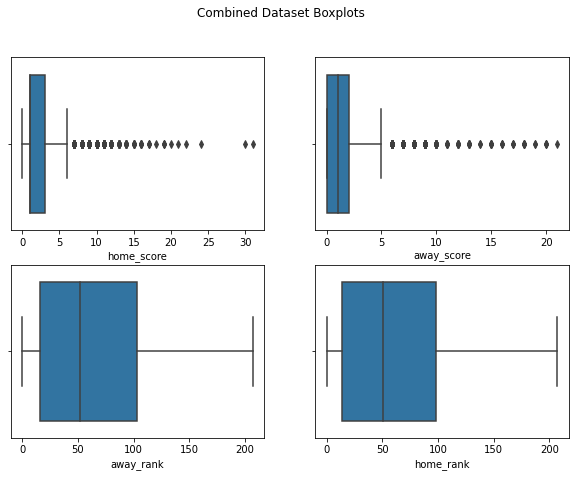

In [238]:
# checking for outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Combined Dataset Boxplots') # Gives the title of the boxplots
sns.boxplot(new_fifa['home_score'], ax=ax1)
sns.boxplot(new_fifa['away_score'], ax=ax2)
sns.boxplot(new_fifa['away_rank'], ax=ax3)
sns.boxplot(new_fifa['home_rank'], ax=ax4)

plt.show()

# we wont deal with the outliers since they are useful to the data
# any team can score more than 5 goals in both home and away
# so technically we are going to leave the way it is

##Univariate Analysis

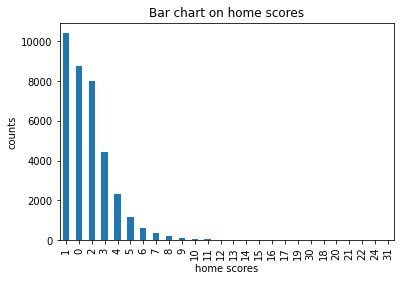

In [239]:
#plottng the homescores
#barchart 
new_fifa['home_score'].value_counts().plot.bar()
plt.title('Bar chart on home scores')
plt.ylabel('counts')
plt.xlabel('home scores')
plt.show()

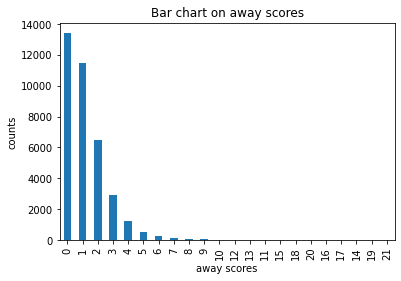

In [240]:
#plotting a bar chart on away scores
new_fifa['away_score'].value_counts().plot.bar()
plt.title('Bar chart on away scores')
plt.ylabel('counts')
plt.xlabel('away scores')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

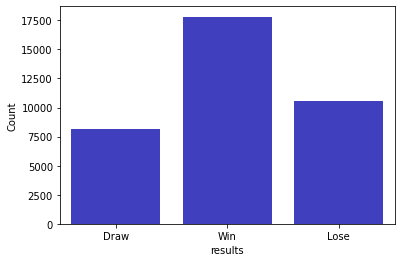

In [241]:
#plotting the results in reference to the scores
#the number of wins, loses and draws

sns.countplot(new_fifa['result'], color='blue',saturation=0.5)
plt.xlabel('results')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Dist of home ranks')

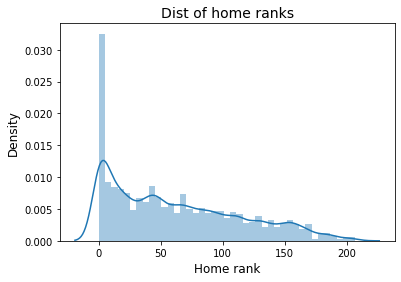

In [242]:
#plotting a distribution of ranks at home

sns.distplot(new_fifa['home_rank'], hist=True)
plt.xlabel('Home rank',size=12)
plt.ylabel('Density',size=12)
plt.title('Dist of home ranks',size=14)

Lets check for correlation

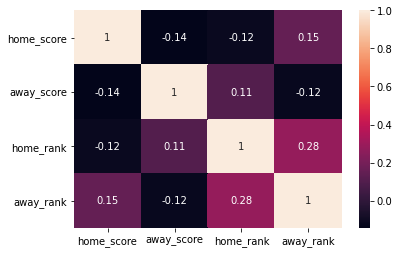

In [243]:
# plot a correlation matrix

sns.heatmap(new_fifa.corr(), annot=True)
plt.show()

##Implementing the solution

In [244]:
# checking for multicollinearity
# Let's display the correlations between the variables
correlations = new_fifa.corr()

correlations

,home_score,away_score,home_rank,away_rank
home_score,1.000000,-0.143854,-0.117031,0.151320
away_score,-0.143854,1.000000,0.105734,-0.121420
home_rank,-0.117031,0.105734,1.000000,0.284151
away_rank,0.151320,-0.121420,0.284151,1.000000


In [245]:
#VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,home_rank,away_rank
home_score,1.065364,0.111711,0.168422,-0.195504
away_score,0.111711,1.049205,-0.140612,0.150446
home_rank,0.168422,-0.140612,1.138604,-0.366094
away_rank,-0.195504,0.150446,-0.366094,1.151877


The VIF score for each variable is found alongside the downwards sloping diagonal. home score is 1.06, away score 1.04 etc

In [246]:
revised = new_fifa.drop(columns=['away_rank'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,home_score,away_score,home_rank
home_score,1.032182,0.137246,0.106286
away_score,0.137246,1.029555,-0.092797
home_rank,0.106286,-0.092797,1.022251


we can see there is a drop in all columns. especially the home rank, we can confidently say that home rank and away rank had correlations

##Polynomial regression

Residual plots and heteroskadesticity

HOME SCORES

In [247]:
#import libraries

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [248]:
revised.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,result
0,Scotland,England,0,0,Friendly,30.0,Draw
1,England,Scotland,4,2,Friendly,11.0,Win
2,Scotland,England,2,1,Friendly,30.0,Win
3,England,Scotland,2,2,Friendly,11.0,Draw
4,Scotland,England,3,0,Friendly,30.0,Win


In [249]:

poly_reg_dataset =  new_fifa.groupby(['home_rank']).mean()

poly_reg_dataset.head()

,home_score,away_score,away_rank
home_rank,,,
0.0,1.961209,1.281360,60.641310
1.0,2.545455,1.052273,37.152273
2.0,1.997423,0.811856,35.752577
3.0,1.744868,1.416422,36.316716
4.0,2.379147,1.206161,34.597156


In [250]:
# specify the independent and dependent variables

X = poly_reg_dataset.index.values.reshape(-1, 1)

y = poly_reg_dataset['home_score'].values.reshape(-1, 1)

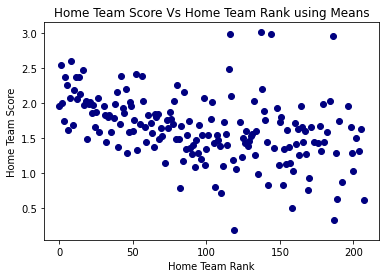

In [251]:

# Visualizing the dataset by plotting a scatter plot

plt.scatter(X, y, color='navy') 
plt.title('Home Team Score Vs Home Team Rank using Means')
plt.xlabel('Home Team Rank')
plt.ylabel('Home Team Score')
plt.show()

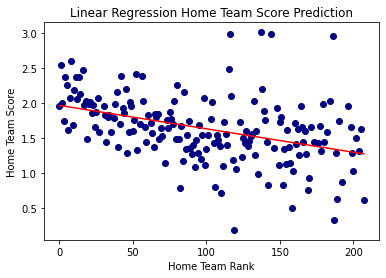

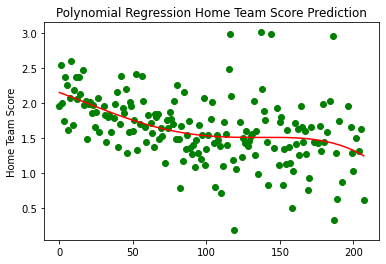

In [252]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(optional to compare the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='navy') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Linear Regression Home Team Score Prediction')
plt.xlabel('Home Team Rank')
plt.ylabel('Home Team Score')
plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


#Visualize the Polynomial Regression results
plt.scatter(X, y, color='green') # To help highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Polynomial Regression Home Team Score Prediction')
plt.ylabel('Home Team Score')
plt.show()

In [253]:

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

#the result justfies that there is overfitting in our regression

Polynomial prediction: 2


cross validating using Leaveoneout

In [254]:
from sklearn.model_selection import LeaveOneOut

# We will use the same independent variables for this
X = new_fifa[['home_rank']].values
y = new_fifa['home_score'].values


folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = []
count = 0  
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 36512 folds
trained 36512 models


1.2884833817299037

AWAY SCORES

In [255]:
#We can try to predict the away_score given the home rank
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [279]:
poly_reg_dataset =  new_fifa.groupby(['away_rank']).mean()

poly_reg_dataset.head()

,home_score,away_score,home_rank,result
away_rank,,,,
0.0,1.922473,1.348626,62.384200,1.263248
1.0,1.340314,2.018325,35.787958,1.054974
2.0,1.220447,1.373802,34.581470,1.031949
3.0,1.917143,1.237143,35.097143,1.314286
4.0,1.446712,1.739229,36.927438,1.111111


In [280]:
# specify the independent and dependent variables

X = poly_reg_dataset.index.values.reshape(-1, 1)

y = poly_reg_dataset['away_score'].values.reshape(-1, 1)

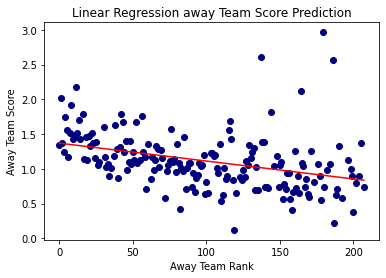

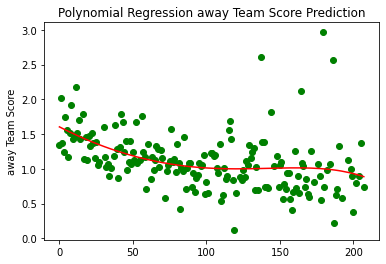

In [281]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(optional to compare the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='navy') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Linear Regression away Team Score Prediction')
plt.xlabel('Away Team Rank')
plt.ylabel('Away Team Score')
plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


#Visualize the Polynomial Regression results
plt.scatter(X, y, color='green') # To help highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Polynomial Regression away Team Score Prediction')
plt.ylabel('away Team Score')
plt.show()

In [282]:

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

#from the prediction result, we know the polynomial regression is overfitted

Polynomial prediction: 1


Cross validation

In [283]:
from sklearn.model_selection import LeaveOneOut

# We will use the same independent variables for this
X = new_fifa[['away_rank']].values
y = new_fifa['away_score'].values


folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = []
count = 0  
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 36512 folds
trained 36512 models


1.0262644854556793

##Logistic Regression

In [284]:
#canverting categorical variables to a dummy indicator
result = pd.get_dummies(new_fifa['result'],drop_first=True)
result.head()

,1,2
0,0,0
1,0,1
2,0,1
3,0,0
4,0,1


In [285]:
new_fifa.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,result
0,Scotland,England,0,0,Friendly,30.0,11.0,0
1,England,Scotland,4,2,Friendly,11.0,30.0,2
2,Scotland,England,2,1,Friendly,30.0,11.0,2
3,England,Scotland,2,2,Friendly,11.0,30.0,0
4,Scotland,England,3,0,Friendly,30.0,11.0,2


In [286]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
new_fifa['result']= label_encoder.fit_transform(new_fifa['result']) 

new_fifa['result'].unique()

#Previewing the dataset
new_fifa.head(10)

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,result
0,Scotland,England,0,0,Friendly,30.0,11.0,0
1,England,Scotland,4,2,Friendly,11.0,30.0,2
2,Scotland,England,2,1,Friendly,30.0,11.0,2
3,England,Scotland,2,2,Friendly,11.0,30.0,0
4,Scotland,England,3,0,Friendly,30.0,11.0,2
5,Scotland,Wales,4,0,Friendly,30.0,27.0,2
6,England,Scotland,1,3,Friendly,11.0,30.0,1
7,Wales,Scotland,0,2,Friendly,27.0,30.0,1
8,Scotland,England,7,2,Friendly,30.0,11.0,2
9,Scotland,Wales,9,0,Friendly,30.0,27.0,2


In [287]:
# Splitting our dataset
#
X = new_fifa.drop("result",axis=1)
y = new_fifa["result"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [288]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

ValueError: ignored

In [275]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

NotFittedError: ignored

In [ ]:
#evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score =(y_test, y_pred)
accuracy_score